In [112]:
import numpy as np
import importlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import os
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import sklearn
%matplotlib inline

import analyzer
import subject
import visualization
import utils
importlib.reload(analyzer)
importlib.reload(subject)
importlib.reload(visualization)

<module 'visualization' from '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/visualization.py'>

Set file paths

In [113]:
rootPath = os.getcwd()
dataFilePath = os.path.join(rootPath, 'data')

In [114]:
surveyDataFilePath = os.path.join(dataFilePath, 'survey.csv')
loggedDataFilesRootPath = dataFilePath

Initialize the analyzer

In [115]:
resultAnalyzer = analyzer.ResultAnalyzer(surveyDataFilePath, loggedDataFilesRootPath)

In [116]:
resultAnalyzer.gradeAnswers(confidenceThreshold=10)

In [117]:
resultAnalyzer.computeIGD(os.path.join(rootPath, 'target_selection.csv'), useShortestDistance=True)

In [118]:
resultAnalyzer.computeHV(os.path.join(rootPath, 'target_selection.csv'))

In [119]:
s0 = resultAnalyzer.subjects[0]
s1 = resultAnalyzer.subjects[1]
s2 = resultAnalyzer.subjects[2]
s3 = resultAnalyzer.subjects[3]
s4 = resultAnalyzer.subjects[4]
s5 = resultAnalyzer.subjects[5]
s6 = resultAnalyzer.subjects[6]


# Get DataFrame

In [120]:
df = resultAnalyzer.getDataFrame(excludeHV=False, adjustIGDUsingEntropy=False)
df

,id,condition,type,fcl,fpwc,dcl,dpwc,FScore,DScore,PScore,...,normalizedDist2UP,meanIGD,normalizedIGD,adjustedIGD,HV,adjustedHV,numDesigns,selfAssessment,selfAssessmentExclude1,entropy
0,5401038285006004819-9_15_19_13,interactive,explicit,0.89,0.56,0.78,0.67,0.73,0.73,0.44,...,0.175,0.073,0.606,0.707,0.544,1.000,12,2.50,2.333,0.717
1,3700789476005004819-9_16_15_58,automated,explicit,0.22,0.33,0.67,0.33,0.28,0.50,0.22,...,1.000,0.034,0.891,0.297,0.643,0.018,42,1.50,2.000,1.392
2,3664515135004004819-9_20_14_13,manual,implicit,0.44,0.67,0.44,0.33,0.56,0.39,0.67,...,0.213,0.076,0.584,0.511,0.472,0.482,16,2.50,2.667,0.991
3,3221520754006004819-10_2_6_8,interactive,explicit,0.33,0.44,0.67,0.78,0.39,0.73,0.11,...,0.610,0.019,1.000,1.000,0.506,0.699,14,2.25,2.333,0.671
4,5577734270005004819-10_4_13_54,automated,explicit,0.44,0.56,0.67,0.22,0.50,0.45,0.44,...,0.846,0.156,0.000,0.000,0.416,0.136,22,3.00,3.000,1.056
5,1708104476004004819-10_8_16_14,manual,implicit,0.22,0.56,0.44,0.11,0.39,0.28,0.33,...,0.000,0.106,0.365,0.213,0.503,0.203,24,2.25,1.667,0.997
6,5772081801006004819-10_10_13_3,interactive,explicit,0.89,0.67,1.00,0.78,0.78,0.89,0.78,...,0.503,0.066,0.657,0.328,0.413,0.000,28,3.25,3.333,1.094


In [121]:
resultAnalyzer.getDataFrame(option="learningTask")

,id,condition,type,LT_numDesignViewed,LT_numFeatureViewed,LT_numFilterUsed,LT_numFeatureFound
0,5401038285006004819-9_15_19_13,interactive,explicit,62,42,0,77
1,3700789476005004819-9_16_15_58,automated,explicit,751,9,0,30
2,3664515135004004819-9_20_14_13,manual,implicit,1018,10,21,0
3,3221520754006004819-10_2_6_8,interactive,explicit,34,14,0,77
4,5577734270005004819-10_4_13_54,automated,explicit,42,10,0,31
5,1708104476004004819-10_8_16_14,manual,implicit,436,12,11,10
6,5772081801006004819-10_10_13_3,interactive,explicit,23,25,1,50


In [122]:
resultAnalyzer.getDataFrame(option="featureSynthesis")

,id,condition,type,meanDist2UP,normalizedDist2UP,FS_numFeatureViewed,FS_numFilterUsed,FS_numFeatureTested
0,5401038285006004819-9_15_19_13,interactive,explicit,0.831,0.175,1,8,7
1,3700789476005004819-9_16_15_58,automated,explicit,0.436,1.000,0,7,6
2,3664515135004004819-9_20_14_13,manual,implicit,0.813,0.213,11,9,11
3,3221520754006004819-10_2_6_8,interactive,explicit,0.623,0.610,4,5,5
4,5577734270005004819-10_4_13_54,automated,explicit,0.510,0.846,0,9,8
5,1708104476004004819-10_8_16_14,manual,implicit,0.915,0.000,2,14,14
6,5772081801006004819-10_10_13_3,interactive,explicit,0.674,0.503,6,11,12


In [123]:
resultAnalyzer.getDataFrame(option="designSynthesis")

,id,condition,type,meanIGD,normalizedIGD,adjustedIGD,numDesigns,DS_numDesignViewed,DS_numDesignEvaluated,entropy
0,5401038285006004819-9_15_19_13,interactive,explicit,0.073,0.606,0.707,12,28,12,0.717
1,3700789476005004819-9_16_15_58,automated,explicit,0.034,0.891,0.297,42,62,42,1.392
2,3664515135004004819-9_20_14_13,manual,implicit,0.076,0.584,0.511,16,38,16,0.991
3,3221520754006004819-10_2_6_8,interactive,explicit,0.019,1.000,1.000,14,33,14,0.671
4,5577734270005004819-10_4_13_54,automated,explicit,0.156,0.000,0.000,22,36,22,1.056
5,1708104476004004819-10_8_16_14,manual,implicit,0.106,0.365,0.213,24,48,24,0.997
6,5772081801006004819-10_10_13_3,interactive,explicit,0.066,0.657,0.328,28,43,28,1.094


In [124]:
df1 = df[['FScore','meanDist2UP','meanIGD','selfAssessment']]
print(df1.to_string(index=False))

FScore  meanDist2UP  meanIGD  selfAssessment
  0.73        0.831    0.073            2.50
  0.28        0.436    0.034            1.50
  0.56        0.813    0.076            2.50
  0.39        0.623    0.019            2.25
  0.50        0.510    0.156            3.00
  0.39        0.915    0.106            2.25
  0.78        0.674    0.066            3.25


# Demographic data

In [14]:
s0.demographic_data

{'age': 33,
 'gender': 2,
 'education': 7,
 'major': 'Aerospace Engineering, Industrial / Systems Engineering',
 'employerType': 'For profit'}

In [15]:
s1.demographic_data

{'age': 34,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering',
 'employerType': 'Academic institution'}

In [16]:
s2.demographic_data

{'age': 31,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering, Electrical Engineering',
 'employerType': 'Non-profit (non-profit research organization, government contractor, etc.)'}

In [17]:
s3.demographic_data

{'age': 34,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering, Industrial / Systems Engineering, Mathematics / Statistics',
 'employerType': 'Non-profit (non-profit research organization, government contractor, etc.)'}

In [18]:
s4.demographic_data

{'age': 36,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering',
 'employerType': 'Government'}

In [19]:
s5.demographic_data

{'age': 33,
 'gender': 1,
 'education': 7,
 'major': 'Other',
 'employerType': 'Academic institution'}

# Get transcript comments

In [20]:
subjects_manual = resultAnalyzer.filterSubjects(condition=4)
subjects_auto = resultAnalyzer.filterSubjects(condition=5)
subjects_interactive = resultAnalyzer.filterSubjects(condition=6)

In [21]:
comments = resultAnalyzer.getComments(resultAnalyzer.subjects, "problem_solving_task", "F_cl_3", displayCondition=True, displayParticipantID=False, displayKeyword=False)

for line in comments:
    print(line)
    print("")
    

[automated] [inaudible] ...

[manual] I think this is False... because SWIRSPEC is both visible and nocturnal (?), so it can be used both day and night. So I'll put the confidence level of 15.

[interactive] Are not assigned to dawn dusk orbits…
That’s illumination type… passive, I see. 
So, I’ll say true. Somewhat more confident.

[automated] CHEM_SWIRSPEC is not assigned to dawn dusk.
Dawn dusk is here. Well, I have nothing, but I saw dawn dusk a few times, I’ve assigned, I’ve had others assigned to it. I don’t see it, I don’t remember seeing it. So, this one. [inaudible]
I don’t think I have any information one way or another, so, but when I did dawn dusk I didn’t see it.
So maybe it’s more true – yes?
[experimenter tells subject they can specify low confidence if unsure of answer]
Oh ok, alright.



In [22]:
resultAnalyzer.getComments(subjects_manual, "problem_solving_task", "F", displayParticipantID=False, displayKeyword=True)


["[F_cl_1] So AERO_POL and HIRES_SOUND...So I'm not sure. So I just click one of the option and say confidence of 0.",
 '[F_cl_2] ...',
 "[F_cl_3] I think this is False... because SWIRSPEC is both visible and nocturnal (?), so it can be used both day and night. So I'll put the confidence level of 15.",
 "[F_cl_4] I'm not confident about this one... ",
 '[F_cl_5] I think this is true. Because dawn and dusk generate more power for the satellite.',
 '[F_cl_6] I think this is false. I think almost all the orbits had some satellites.',
 "[F_cl_7] I'm not sure of this...",
 "[F_cl_8] I'm not sure...",
 '[F_cl_9] I think I oberved most of the instrument - vegetation - to be in 600km, but not sure if it was INSAR or the other type of the vegetation instrument.',
 "[F_pwc_1] I'm not sure.",
 "[F_pwc_2] I think it's the first one.. but not 100% confident.",
 '[F_pwc_3] I think uh... lidars and radars should not be assigned to the same orbit. But I did not oberved it within this tutorial. So I wi

In [23]:
resultAnalyzer.getComments(subjects_auto, "problem_solving_task", "F_cl", displayParticipantID=False, displayKeyword=True)


['[F_cl_1] I think so...',
 "[F_cl_2] Honestly, I don't, in this case, I'm not referring to tradespace, and referring to what I know. ",
 '[F_cl_3] [inaudible] ...',
 '[F_cl_4] Yes that is true, I remember that.',
 '[F_cl_5] Yes, correct...',
 "[F_cl_6] This one, I don't know. I'm going to guess.",
 "[F_cl_7] No I remember that SAR_ALTIM was always on its own. But I don't remeber the orbit honestly. Well, I think it's false but not really confident.",
 "[F_cl_8] I don't know...",
 '[F_cl_9] [inaudible] I think [inaudible]',
 '[F_cl_1] Yeah, ok well we’ll see, had I known I would have spent more picking more, well maybe, well we’ll see. Cause, I don’t remember those. Well, there’s that one. Yeah.\n[experimenter reminds subject they can use their text notes]\nWell, I don’t remember some of these so.\nDo you think the following feature is shared by more than 70% of the design in the target region?\nI’d say false, but I’m not super confident. 25%',
 '[F_cl_2] Ah, high power. Wow. Don’t kno

In [24]:
comments = resultAnalyzer.getComments(resultAnalyzer.subjects, "survey", "gen", displayCondition=True, displayParticipantID=False, displayKeyword=True)

for line in comments:
    print(line + "\n")

[automated | 1_gen] I think this one, cause it is more specific.

[automated | 2_gen] And I think this one is clearer. 

[automated | 3_gen] This is also clearer, to me.

[manual | 1_gen] I think two radars can be assigned to the same orbit.
[Experimenter explained to the participant that this survey is asking only preference]
Ok so I think the second option is more useful information, because it specifies the instrument types... I think it's the first option because it applies to many different instruments. Which need not be those specific types but can still be radars.

[manual | 2_gen] So in the second case too, following the same reason.

[manual | 3_gen] In the third case too.



# Synthesis task data visualization

In [25]:
g1 = [s2, s5]
g2 = [s1, s4]
g3 = [s0, s3, s6]
# g3 = [s6]

In [26]:
visualizer = visualization.Visualizer(groups=[g1,g2,g3], groupNames=['Manual','Automated','Interactive'])

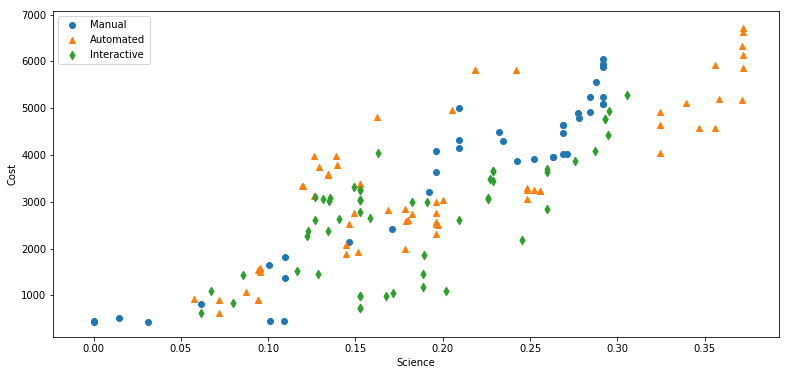

In [27]:
visualizer.designSynthesisScatter(markers=['o','^','d'])


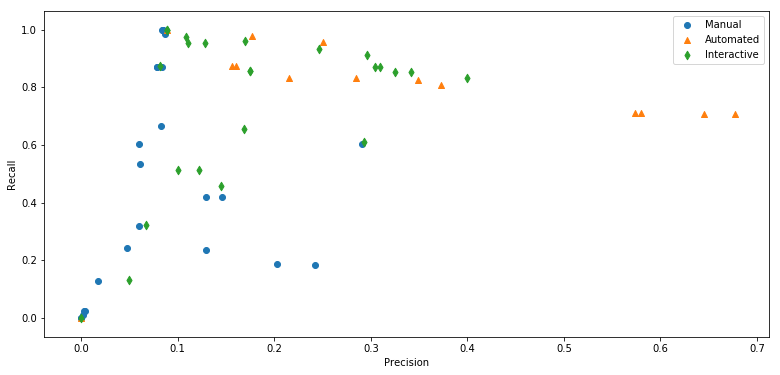

In [28]:
visualizer.featureSynthesisScatter(markers=['o','^','d'])


# Parallel coordinates

In [29]:
visualizer.setDataFrame(df)

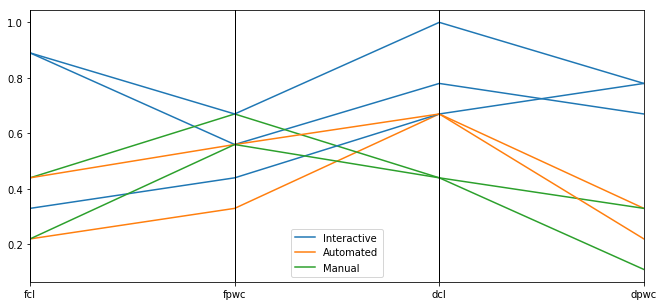

In [30]:
visualizer.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc'], 
                                figsize=(11,5),
                               legend=["Interactive","Automated","Manual"])

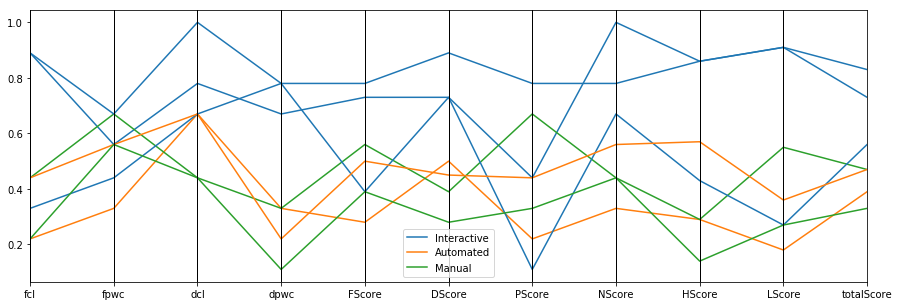

In [31]:
visualizer.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                               legend=["Interactive","Automated","Manual"])

In [32]:
PROP_CYCLE = plt.rcParams['axes.prop_cycle']
COLORS = PROP_CYCLE.by_key()['color']

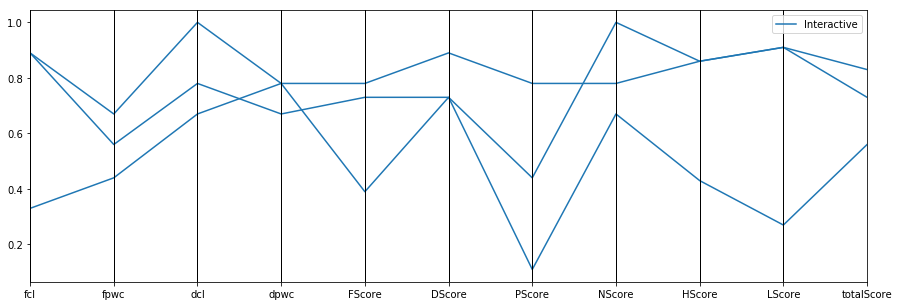

In [33]:
tempVis = visualization.Visualizer(groups=[g3], groupNames=['Interactive'])
tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "interactive"]
tempVis.setDataFrame(tempDF)

tempVis.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                               legend=["Interactive"])

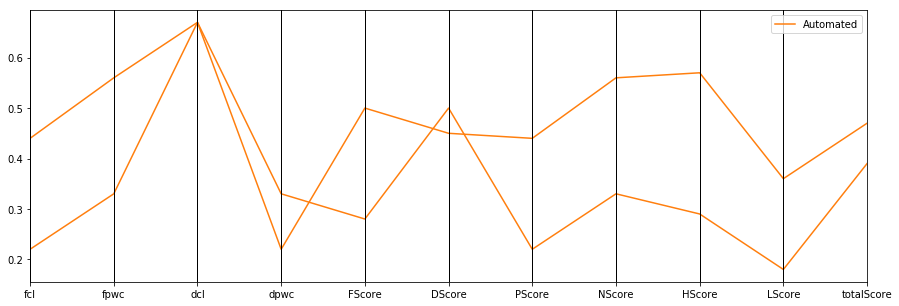

In [34]:

tempVis = visualization.Visualizer(groups=[g3], groupNames=['Automated'])

tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "automated"]
tempVis.setDataFrame(tempDF)

tempVis.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                                colors=[COLORS[1]],
                               legend=["Automated"])



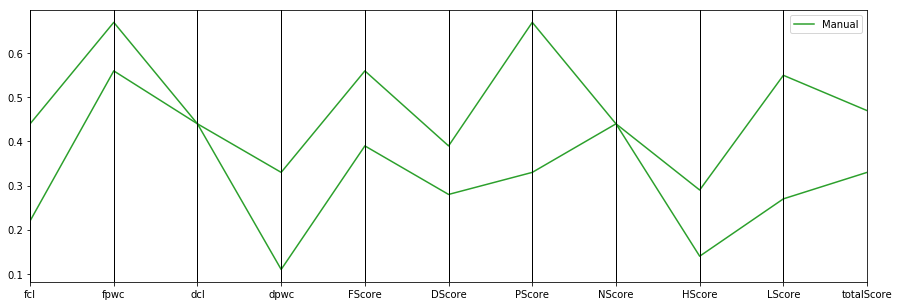

In [35]:
tempVis = visualization.Visualizer(groups=[g3], groupNames=['Manual'])

tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "manual"]
tempVis.setDataFrame(tempDF)

tempVis.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                            colors=[COLORS[2]],
                               legend=["Manual"])


# Box plots

In [36]:
# visualizer.boxPlot(columns=['FScore','DScore', 'totalScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [37]:
# visualizer.boxPlot(columns=['PScore','NScore', 'FScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [38]:
# visualizer.boxPlot(columns=['HScore','LScore', 'FScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [39]:
# visualizer.boxPlot(columns=['meanDist2UP', 'meanIGD', 'totalScore'], nrows=1, ncols=3, sharey=False, figsize=(14,4.5))

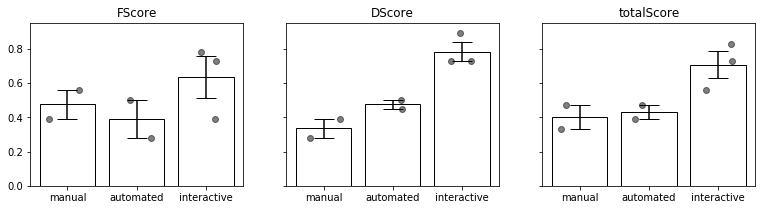

In [40]:
visualizer.barPlot(columns=['FScore','DScore', 'totalScore'], showError=True, nrows=1, ncols=3, sharey=True, figsize=(13,3))


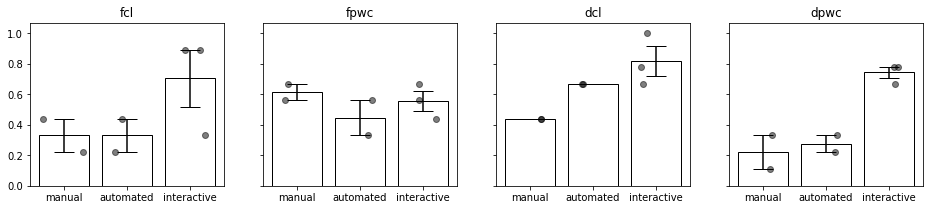

In [41]:
visualizer.barPlot(columns=['fcl','fpwc','dcl','dpwc'], showError=True, nrows=1, ncols=4, sharey=True, figsize=(16,3))


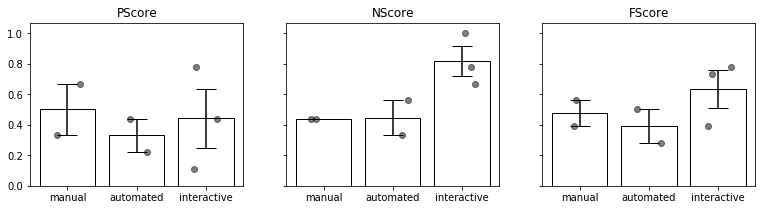

In [42]:
visualizer.barPlot(columns=['PScore','NScore', 'FScore'], showError=True, nrows=1, ncols=3, sharey=True, figsize=(13,3))

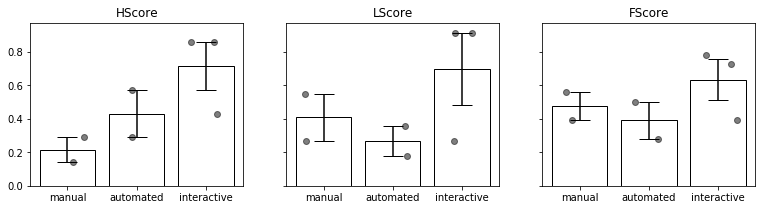

In [43]:
visualizer.barPlot(columns=['HScore','LScore', 'FScore'], showError=True, nrows=1, ncols=3, sharey=True, figsize=(13,3))

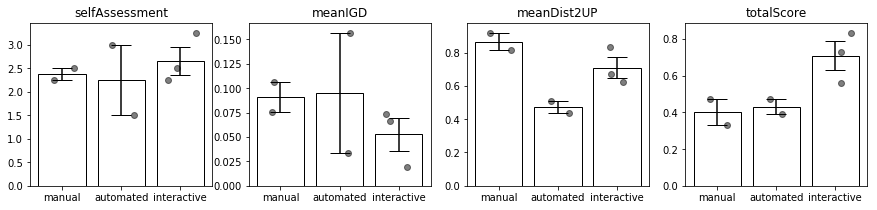

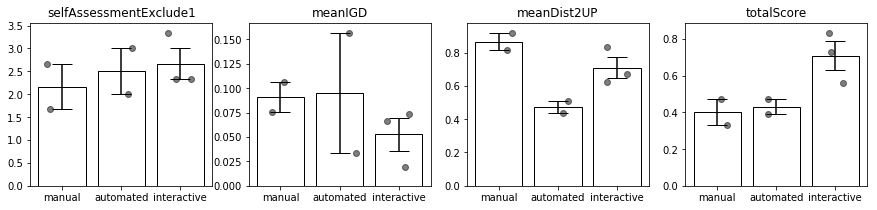

In [44]:
visualizer.barPlot(dataFrame=df, columns=['selfAssessment', 'meanIGD', 'meanDist2UP', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))
visualizer.barPlot(dataFrame=df, columns=['selfAssessmentExclude1', 'meanIGD', 'meanDist2UP', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))



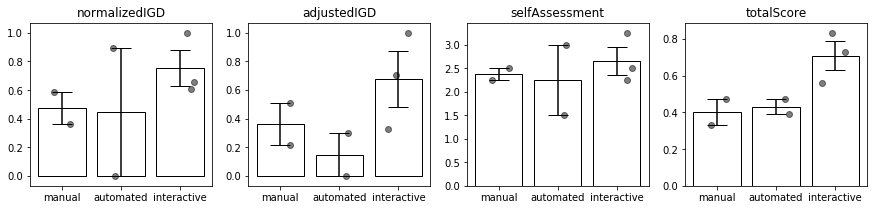

In [125]:
visualizer.barPlot(dataFrame=df, columns=['normalizedIGD', 'adjustedIGD', 'selfAssessment', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


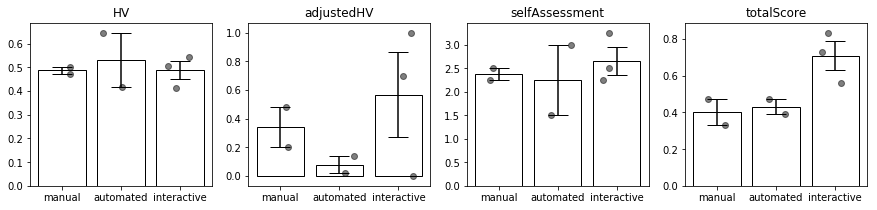

In [126]:
visualizer.barPlot(dataFrame=df, columns=['HV', 'adjustedHV', 'selfAssessment', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


In [47]:
df

,id,condition,type,fcl,fpwc,dcl,dpwc,FScore,DScore,PScore,...,normalizedDist2UP,meanIGD,normalizedIGD,adjustedIGD,HV,adjustedHV,numDesigns,selfAssessment,selfAssessmentExclude1,entropy
0,5401038285006004819-9_15_19_13,interactive,explicit,0.89,0.56,0.78,0.67,0.73,0.73,0.44,...,0.175,0.073,0.606,0.567,0.544,1.000,12,2.50,2.333,0.717
1,3700789476005004819-9_16_15_58,automated,explicit,0.22,0.33,0.67,0.33,0.28,0.50,0.22,...,1.000,0.034,0.891,0.429,0.643,0.018,42,1.50,2.000,1.392
2,3664515135004004819-9_20_14_13,manual,implicit,0.44,0.67,0.44,0.33,0.56,0.39,0.67,...,0.213,0.076,0.584,0.395,0.472,0.482,16,2.50,2.667,0.991
3,3221520754006004819-10_2_6_8,interactive,explicit,0.33,0.44,0.67,0.78,0.39,0.73,0.11,...,0.610,0.019,1.000,1.000,0.506,0.699,14,2.25,2.333,0.671
4,5577734270005004819-10_4_13_54,automated,explicit,0.44,0.56,0.67,0.22,0.50,0.45,0.44,...,0.846,0.156,0.000,0.000,0.416,0.136,22,3.00,3.000,1.056
5,1708104476004004819-10_8_16_14,manual,implicit,0.22,0.56,0.44,0.11,0.39,0.28,0.33,...,0.000,0.106,0.365,0.246,0.503,0.203,24,2.25,1.667,0.997
6,5772081801006004819-10_10_13_3,interactive,explicit,0.89,0.67,1.00,0.78,0.78,0.89,0.78,...,0.503,0.066,0.657,0.403,0.413,0.000,28,3.25,3.333,1.094


# Box plots - Logged Data

In [48]:
# df_lt = resultAnalyzer.getDataFrame(option="learningTask",columns=['totalScore'])
# visualizer.boxPlot(columns=['LT_numDesignViewed','LT_numFeatureViewed','totalScore'], dataFrame=df_lt, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))



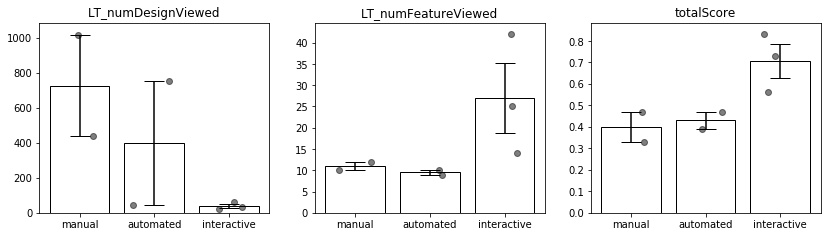

In [49]:
df_lt = resultAnalyzer.getDataFrame(option="learningTask", columns=["totalScore"])
visualizer.barPlot(columns=['LT_numDesignViewed','LT_numFeatureViewed','totalScore'], dataFrame=df_lt, showError=True, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))


In [50]:
# df_fs = resultAnalyzer.getDataFrame(option="featureSynthesis")
# visualizer.boxPlot(columns=['meanDist2UP','FS_numFeatureViewed', 'FS_numFilterUsed','FS_numFeatureTested'], dataFrame=df_fs, nrows=1, ncols=4, sharey=False, figsize=(16,4))



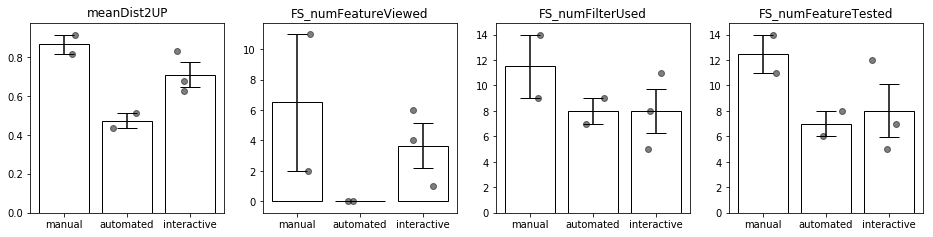

In [51]:
df_fs = resultAnalyzer.getDataFrame(option="featureSynthesis", invertSIB=False)
visualizer.barPlot(columns=['meanDist2UP','FS_numFeatureViewed', 'FS_numFilterUsed','FS_numFeatureTested'], dataFrame=df_fs, showError=True, nrows=1, ncols=4, sharey=False, figsize=(16,3.5))


In [52]:
# df_ds = resultAnalyzer.getDataFrame(option="designSynthesis")
# visualizer.boxPlot(columns=['meanIGD','numDesigns', 'DS_numDesignViewed'], dataFrame=df_ds, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))



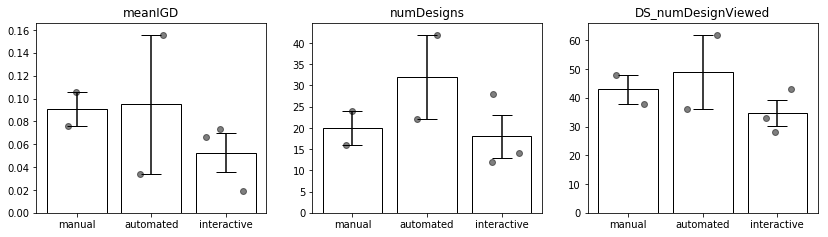

In [53]:
df_ds = resultAnalyzer.getDataFrame(option="designSynthesis", invertSIB=False)
visualizer.barPlot(columns=['meanIGD','numDesigns', 'DS_numDesignViewed'], dataFrame=df_ds, showError=True, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))


# Statistical tests

In [54]:
df_interactive = df.loc[df['condition'] == "interactive"]
df_automated = df.loc[df['condition'] == "automated"]
df_manual = df.loc[df['condition'] == "manual"]

In [55]:
print(stats.ttest_ind(df_interactive['totalScore'], df_manual['totalScore']))
print(stats.ttest_ind(df_interactive['totalScore'], df_automated['totalScore']))

Ttest_indResult(statistic=2.6820143797423013, pvalue=0.07492051569852315)
Ttest_indResult(statistic=2.609512442862909, pvalue=0.07971848867244173)


In [56]:
print(stats.ttest_ind(df_interactive['DScore'], df_manual['DScore']))
print(stats.ttest_ind(df_interactive['DScore'], df_automated['DScore']))

Ttest_indResult(statistic=5.594865809996459, pvalue=0.01127926234620286)
Ttest_indResult(statistic=4.32263442068027, pvalue=0.0228189237556945)


In [57]:
print(stats.ttest_ind(df_automated['DScore'], df_manual['DScore']))

Ttest_indResult(statistic=2.3172964880866296, pvalue=0.14640493481043074)


In [58]:
print(stats.ttest_ind(df_interactive['NScore'], df_manual['NScore']))
print(stats.ttest_ind(df_interactive['NScore'], df_automated['NScore']))

Ttest_indResult(statistic=3.007546588450481, pvalue=0.05732346904976063)
Ttest_indResult(statistic=2.4489727104815637, pvalue=0.09176335554706658)


In [59]:
print(stats.ttest_ind(df_interactive['HScore'], df_manual['HScore']))
print(stats.ttest_ind(df_interactive['HScore'], df_automated['HScore']))

Ttest_indResult(statistic=2.595245502727552, pvalue=0.0807068761527923)
Ttest_indResult(statistic=1.3494174186354888, pvalue=0.270005021963656)


In [60]:
stats.f_oneway(df_interactive['totalScore'], df_automated['totalScore'], df_manual['totalScore'])

F_onewayResult(statistic=5.83819628647215, pvalue=0.06510700553422599)

In [61]:
stats.f_oneway(df_interactive['DScore'], df_automated['DScore'], df_manual['DScore'])

F_onewayResult(statistic=21.749071721711903, pvalue=0.007091967116313904)

In [62]:
stats.f_oneway(df_interactive['NScore'], df_automated['NScore'], df_manual['NScore'])

F_onewayResult(statistic=5.789576453697055, pvalue=0.06592229265305508)

In [63]:
stats.f_oneway(df_interactive['HScore'], df_automated['HScore'], df_manual['HScore'])

F_onewayResult(statistic=3.5986074752264923, pvalue=0.12761447906133022)

In [64]:
# from sklearn.linear_model import LinearRegression

# # X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

# X = df[['condition','NScore']].values
# y = df['totalScore'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, y)  # perform linear regression


In [65]:
# linear_regressor.score(X, y)

In [66]:
# linear_regressor.coef_

In [67]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# data = sm.datasets.get_rdataset("dietox", "geepack").data
# md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
# mdf = md.fit()
# print(mdf.summary())

# Survey results

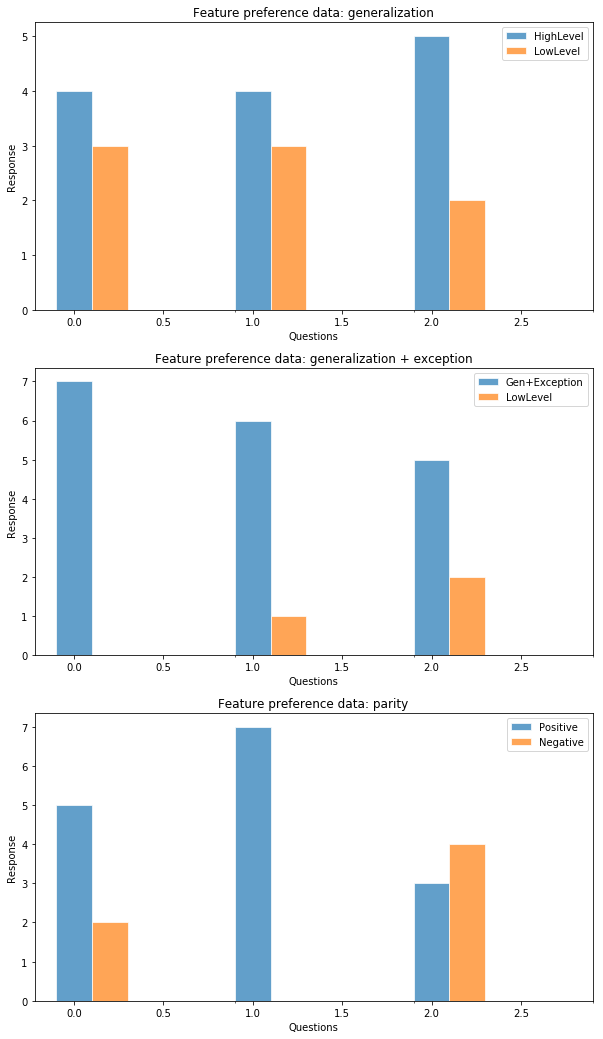

In [68]:
visualizer.featurePrefPlot(figsize=(10,18))

1
- Two radars should not be assigned to the same orbit
- Instruments {AERO_POL, CPR_RAD, SAR_ALTIM} are not assigned to the same orbit

2.
- Instruments that measure ocean color are not assigned to AM orbit
- AERO_LID, CPR_RAD are not assigned to SSO-600-DD orbit

3.
- Atmospheric chemistry instruments are assigned together in the same orbit
- HIRES_SOUND and HYP_IMAG are assigned together in the same orbit

4.
- SSO-800-DD is empty, except when it contains VEG_LID and/or SAR_ALTIM
- {OCE_SPEC, AERO_POL, AERO_LID, HYP_ERB, CPR_RAD, VEG_INSAR, CHEM_UVSPEC,CHEM_SWIRSPEC, HYP_IMAG, HIRES_SOUND} are not assigned to SSO-800-DD

5.
- VEG_INSAR is not used, except when it is assigned to LEO-600-polar
- HYP_ERB is not assigned to any of the orbits in the set {LEO-600-polar, SSO-600-AM, SSO-600-DD, SSO-800-DD}

6.
- Radars and lidars are not assigned to the same orbit, except when VEG_LID and VEG_INSAR are assigned together
- AERO_LID and CPR_RAD is not assigned together in the same orbit, and SAR_ALTIM and AERO_LID are not assigned together in the same orbit

7.
- AERO_POL and SAR_ALTIM are NOT assigned together in the same orbit
- CHEM_UVSPEC and HIRES_SOUND are assigned together in at least one of the orbits

8.
- OCE_SPEC is assigned to LEO-600-polar
- VEG_INSAR is NOT assigned to SSO-600-AM

9.
- AERO_LID is NOT used
- SAR_ALTIM is used

[[3.0, 3.0, 2.0, 1.5], [1.5, 2.5, 2.5, 2.5], [2.6666666666666665, 3.3333333333333335, 2.3333333333333335, 2.3333333333333335]]


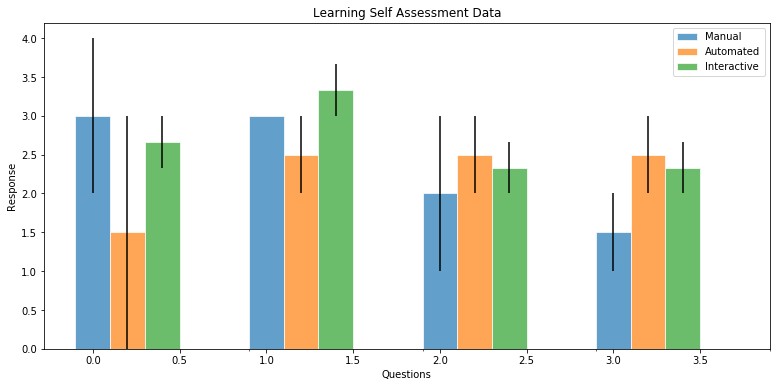

In [69]:
visualizer.selfAssessmentPlot(displayStderr=True)

1. I learned a lot about the given design problem from this exercise
2. The features I learned from this exercise will be useful to solve a different (but similar)
design problem in the future
3. The tool was useful in checking hypotheses I had based on my prior knowledge
4. The tool was useful in checking new hypotheses I had as I analyzed the data.

0=strongly disagree, 1=disagree, 2=undecided, 3=agree, 4=strongly agree

In [70]:
df

,id,condition,type,fcl,fpwc,dcl,dpwc,FScore,DScore,PScore,...,normalizedDist2UP,meanIGD,normalizedIGD,adjustedIGD,HV,adjustedHV,numDesigns,selfAssessment,selfAssessmentExclude1,entropy
0,5401038285006004819-9_15_19_13,interactive,explicit,0.89,0.56,0.78,0.67,0.73,0.73,0.44,...,0.175,0.073,0.606,0.567,0.544,1.000,12,2.50,2.333,0.717
1,3700789476005004819-9_16_15_58,automated,explicit,0.22,0.33,0.67,0.33,0.28,0.50,0.22,...,1.000,0.034,0.891,0.429,0.643,0.018,42,1.50,2.000,1.392
2,3664515135004004819-9_20_14_13,manual,implicit,0.44,0.67,0.44,0.33,0.56,0.39,0.67,...,0.213,0.076,0.584,0.395,0.472,0.482,16,2.50,2.667,0.991
3,3221520754006004819-10_2_6_8,interactive,explicit,0.33,0.44,0.67,0.78,0.39,0.73,0.11,...,0.610,0.019,1.000,1.000,0.506,0.699,14,2.25,2.333,0.671
4,5577734270005004819-10_4_13_54,automated,explicit,0.44,0.56,0.67,0.22,0.50,0.45,0.44,...,0.846,0.156,0.000,0.000,0.416,0.136,22,3.00,3.000,1.056
5,1708104476004004819-10_8_16_14,manual,implicit,0.22,0.56,0.44,0.11,0.39,0.28,0.33,...,0.000,0.106,0.365,0.246,0.503,0.203,24,2.25,1.667,0.997
6,5772081801006004819-10_10_13_3,interactive,explicit,0.89,0.67,1.00,0.78,0.78,0.89,0.78,...,0.503,0.066,0.657,0.403,0.413,0.000,28,3.25,3.333,1.094


## Correlation between self learning assessment and problem set score

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


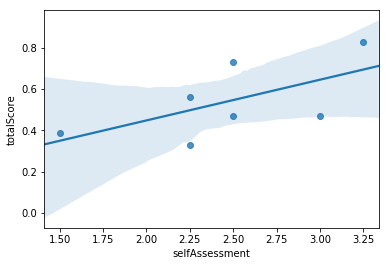

In [71]:
sns.regplot(x="selfAssessment", y="totalScore", data=df, ci=95)

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


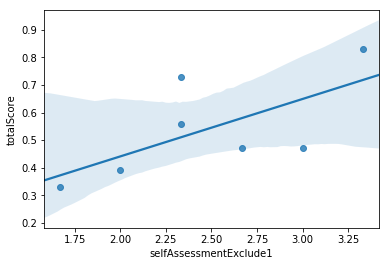

In [72]:
sns.regplot(x="selfAssessmentExclude1", y="totalScore", data=df, ci=95)

In [73]:
mod = sm.OLS(np.array(df['selfAssessmentExclude1']), np.array(df['totalScore']))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              114.1
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                    3.98e-05
Time:                        18:41:51   Log-Likelihood:                         -5.9494
No. Observations:                   7   AIC:                                      13.90
Df Residuals:                       6   BIC:                                      13.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/anaconda3/envs/data_mining_analysis/lib/python3.6/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


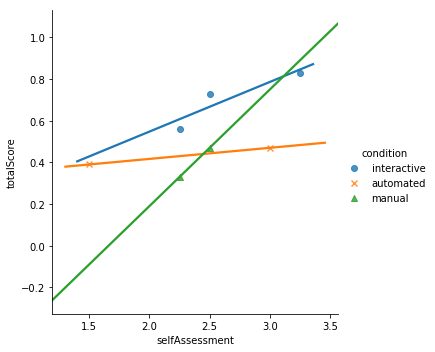

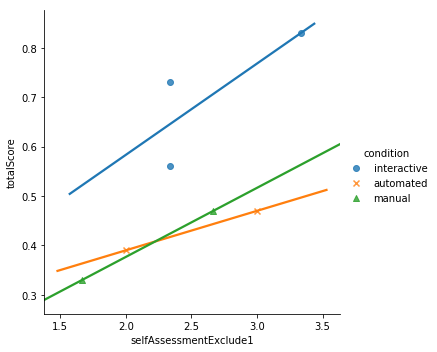

In [74]:
sns.lmplot(x="selfAssessment", y="totalScore", hue="condition", markers=["o","x","^"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="totalScore", hue="condition", markers=["o","x","^"], data=df, ci=None);

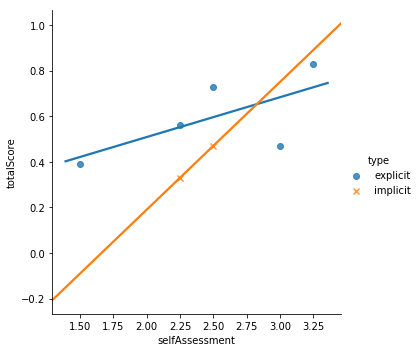

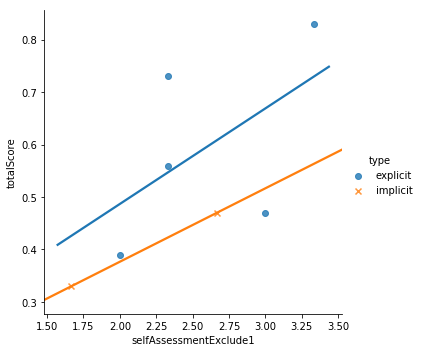

In [75]:
sns.lmplot(x="selfAssessment", y="totalScore", hue="type", markers=["o","x"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="totalScore", hue="type", markers=["o","x"], data=df, ci=None);

In [76]:
df_interactive = resultAnalyzer.getDataFrame().loc[df['condition'] == "interactive"]
mod = sm.OLS(np.array(df_interactive['selfAssessment']), np.array(df_interactive['totalScore']))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              447.1
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                     0.00223
Time:                        18:41:52   Log-Likelihood:                         0.88429
No. Observations:                   3   AIC:                                     0.2314
Df Residuals:                       2   BIC:                                    -0.6700
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/anaconda3/envs/data_mining_analysis/lib/python3.6/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


In [77]:
df_automated = resultAnalyzer.getDataFrame().loc[df['condition'] == "automated"]
mod = sm.OLS(np.array(df_automated['selfAssessment']), np.array(df_automated['totalScore']))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              18.41
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                       0.146
Time:                        18:41:52   Log-Likelihood:                         -1.5995
No. Observations:                   2   AIC:                                      5.199
Df Residuals:                       1   BIC:                                      3.892
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/anaconda3/envs/data_mining_analysis/lib/python3.6/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)


In [78]:
df_manual = resultAnalyzer.getDataFrame().loc[df['condition'] == "manual"]
mod = sm.OLS(np.array(df_manual['selfAssessment']), np.array(df_manual['totalScore']))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              68.02
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                      0.0768
Time:                        18:41:52   Log-Likelihood:                        -0.33627
No. Observations:                   2   AIC:                                      2.673
Df Residuals:                       1   BIC:                                      1.366
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/anaconda3/envs/data_mining_analysis/lib/python3.6/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)


## Correlation between problem set score and design IGD

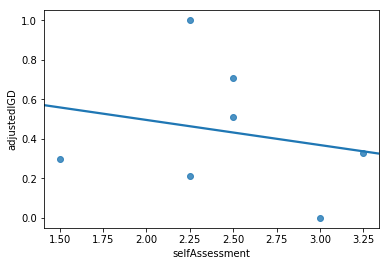

In [128]:
sns.regplot(x="selfAssessment", y="adjustedIGD", data=df, ci=None);

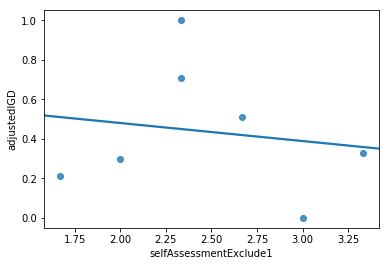

In [127]:
sns.regplot(x="selfAssessmentExclude1", y="adjustedIGD", data=df, ci=None);

In [81]:
xmod = sm.OLS(np.array(df['selfAssessment']), np.array(df['meanIGD']))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              68.02
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                      0.0768
Time:                        18:41:52   Log-Likelihood:                        -0.33627
No. Observations:                   2   AIC:                                      2.673
Df Residuals:                       1   BIC:                                      1.366
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/anaconda3/envs/data_mining_analysis/lib/python3.6/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)


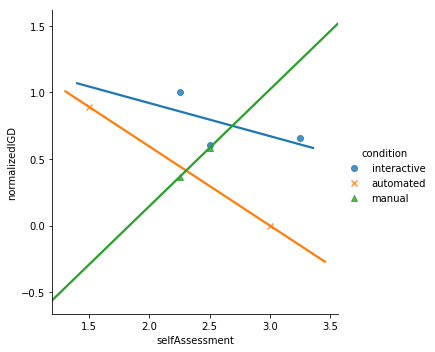

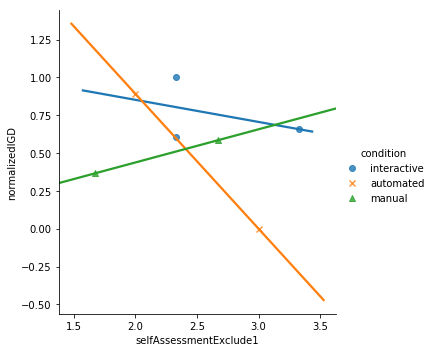

In [82]:
sns.lmplot(x="selfAssessment", y="normalizedIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="normalizedIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);

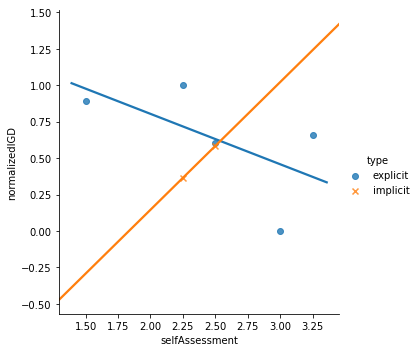

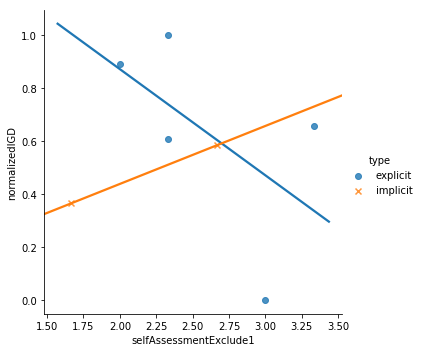

In [83]:
sns.lmplot(x="selfAssessment", y="normalizedIGD", hue="type", markers=["o","x"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="normalizedIGD", hue="type", markers=["o","x"], data=df, ci=None);

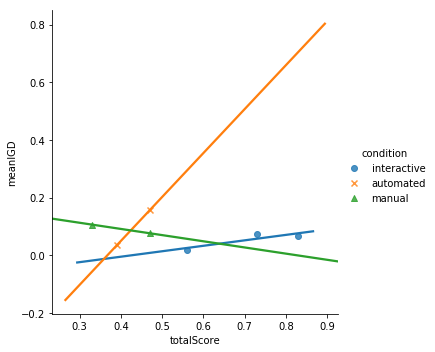

In [84]:
sns.lmplot(x="totalScore", y="meanIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);


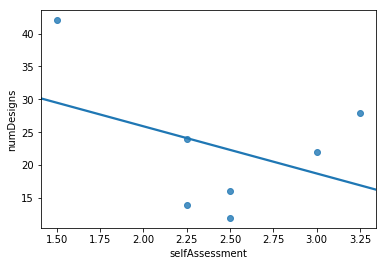

In [85]:
sns.regplot(x="selfAssessment", y="numDesigns", data=df, ci=None);

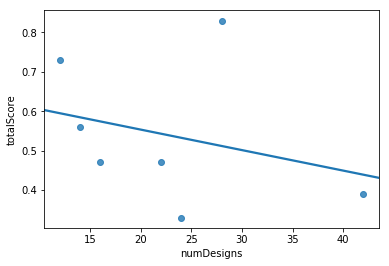

In [86]:
sns.regplot(x="numDesigns", y="totalScore", data=df, ci=None);

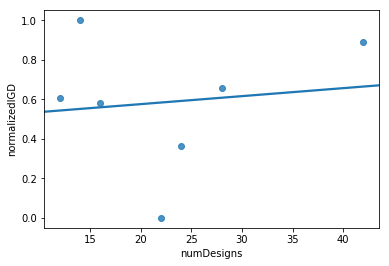

In [87]:
sns.regplot(x="numDesigns", y="normalizedIGD", data=df, ci=None);

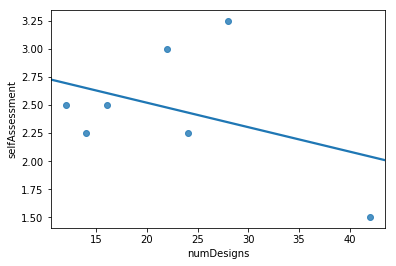

In [88]:
sns.regplot(x="numDesigns", y="selfAssessment", data=df, ci=None);

In [89]:
df[["condition","totalScore","HV","adjustedHV","adjustedIGD","numDesigns"]]

,condition,totalScore,HV,adjustedHV,adjustedIGD,numDesigns
0,interactive,0.73,0.544,1.000,0.567,12
1,automated,0.39,0.643,0.018,0.429,42
2,manual,0.47,0.472,0.482,0.395,16
3,interactive,0.56,0.506,0.699,1.000,14
4,automated,0.47,0.416,0.136,0.000,22
5,manual,0.33,0.503,0.203,0.246,24
6,interactive,0.83,0.413,0.000,0.403,28


In [90]:
# df = df.drop(index=1)

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


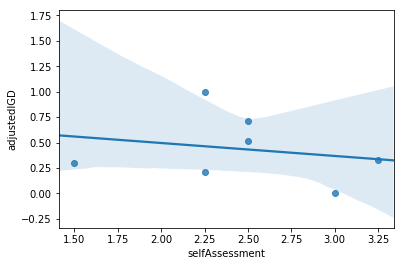

In [129]:
sns.regplot(x="selfAssessment", y="adjustedIGD", data=df);

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


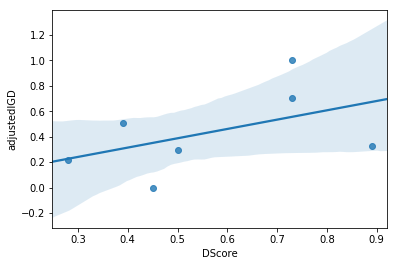

In [131]:
sns.regplot(x="DScore", y="adjustedIGD", data=df);

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


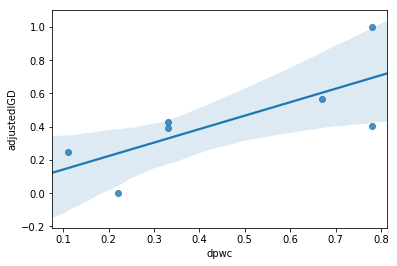

In [92]:
sns.regplot(x="dpwc", y="adjustedIGD", data=df);

## Correlation between problem set score and distance to the utopia point

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


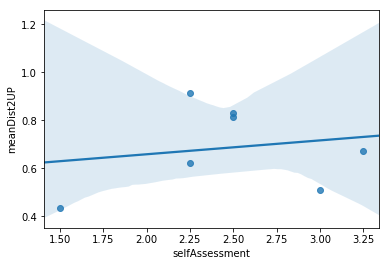

In [93]:
sns.regplot(x="selfAssessment", y="meanDist2UP", data=df);

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


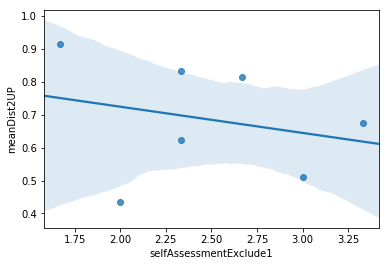

In [94]:
sns.regplot(x="selfAssessmentExclude1", y="meanDist2UP", data=df);

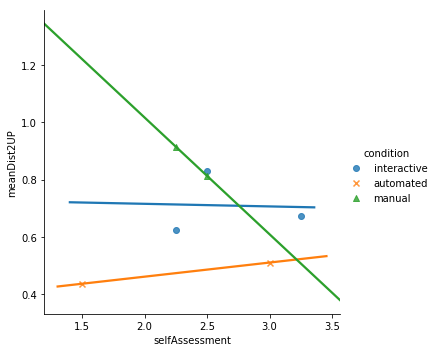

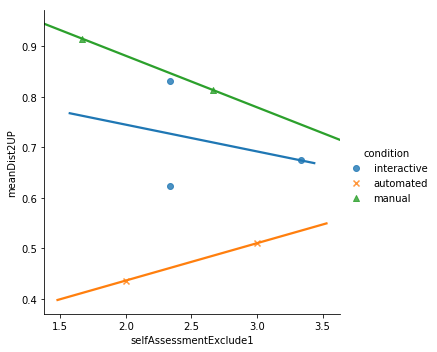

In [95]:
sns.lmplot(x="selfAssessment", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);

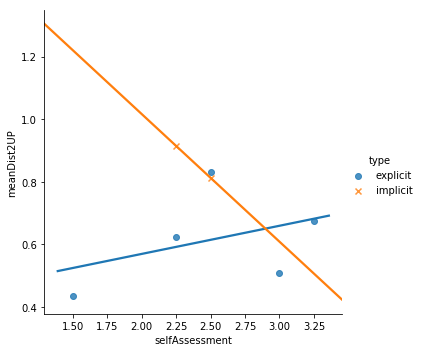

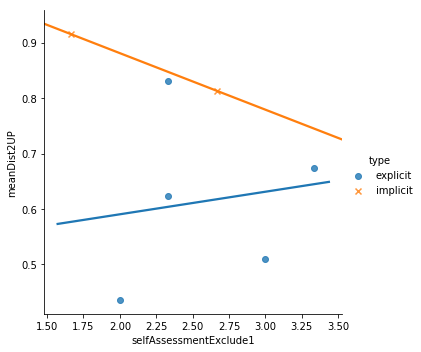

In [96]:
sns.lmplot(x="selfAssessment", y="meanDist2UP", hue="type", markers=["o","x"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="meanDist2UP", hue="type", markers=["o","x"], data=df, ci=None);

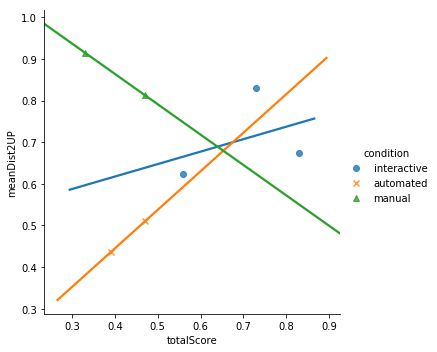

In [97]:
sns.lmplot(x="totalScore", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [98]:
mod = sm.OLS(np.array(df['selfAssessment']), np.array(df['meanDist2UP']))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              71.22
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                    0.000151
Time:                        18:41:57   Log-Likelihood:                         -7.4588
No. Observations:                   7   AIC:                                      16.92
Df Residuals:                       6   BIC:                                      16.86
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/anaconda3/envs/data_mining_analysis/lib/python3.6/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [99]:
df.columns

Index(['id', 'condition', 'type', 'fcl', 'fpwc', 'dcl', 'dpwc', 'FScore',
       'DScore', 'PScore', 'NScore', 'HScore', 'LScore', 'totalScore',
       'meanDist2UP', 'normalizedDist2UP', 'meanIGD', 'normalizedIGD',
       'adjustedIGD', 'HV', 'adjustedHV', 'numDesigns', 'selfAssessment',
       'selfAssessmentExclude1', 'entropy'],
      dtype='object')

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


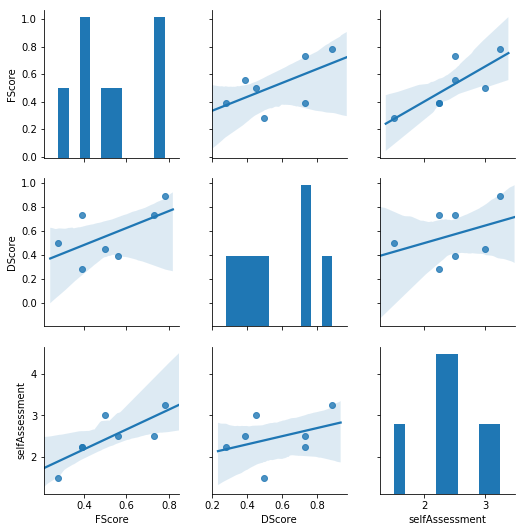

In [100]:
sns.pairplot(df[['condition','FScore','DScore','selfAssessment']], kind="reg")

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


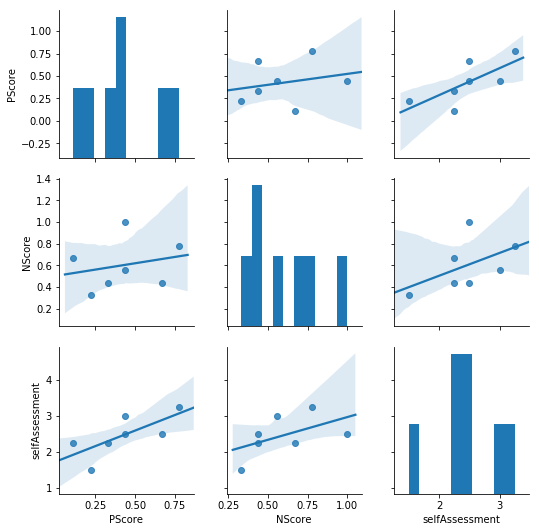

In [101]:
sns.pairplot(df[['condition','PScore','NScore','selfAssessment']], kind="reg")

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


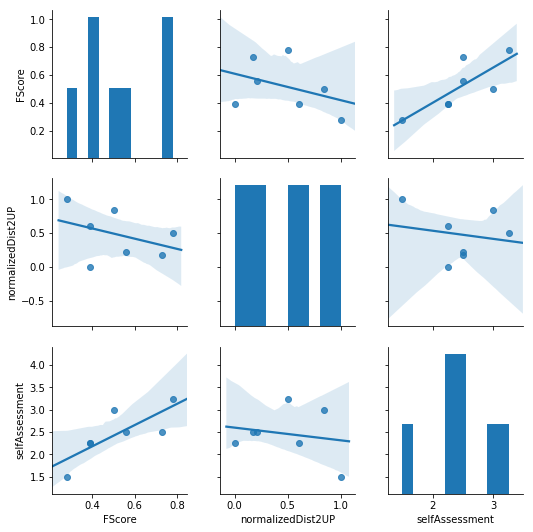

In [102]:
sns.pairplot(df[['condition','FScore','normalizedDist2UP','selfAssessment']], kind="reg")

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


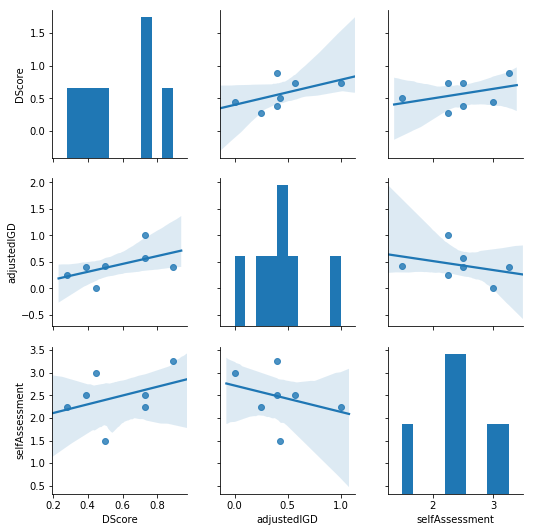

In [103]:
sns.pairplot(df[['condition','DScore','adjustedIGD','selfAssessment']], kind="reg")

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


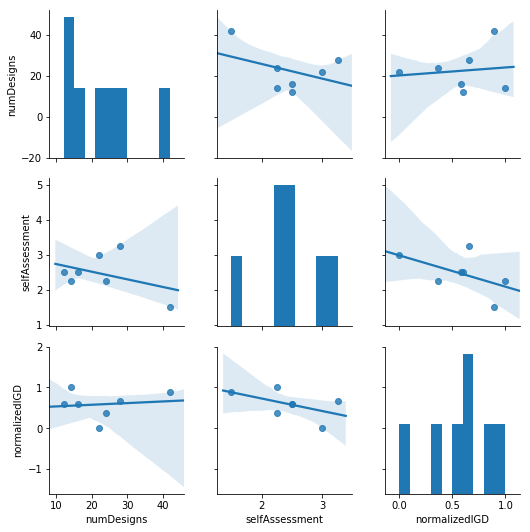

In [104]:
sns.pairplot(df[['condition','numDesigns','selfAssessment','normalizedIGD']], kind="reg")

/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


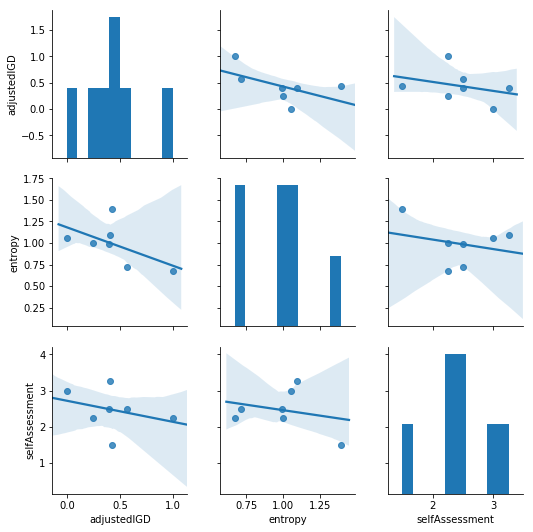

In [111]:
sns.pairplot(df[['condition','adjustedIGD','entropy','selfAssessment']], kind="reg")

# Entropy

In [106]:
subjects = resultAnalyzer.subjects



In [107]:
def rearrangeDesignInputs(inputs):
    inputAppearance = []
    
    for designIndex, designInputString in enumerate(inputs):
        if len(inputAppearance) == 0:
            inputAppearance = [[] for k in range(len(designInputString))]
        
        for inputIndex, val in enumerate(designInputString):
            if val == "1":
                inputAppearance[inputIndex].append(designIndex)
    return inputAppearance

In [108]:
def getEntropy(inputAppearances, base=10):
    N = len(inputAppearances)
    
    sig = 0
    for i, appearances in enumerate(inputAppearances):
        if len(appearances) == 0:
            continue
        else:
            p = len(appearances) / N
            sig += p * math.log(p,base) 
    H = - 1 / math.log(N, base) * sig
    return H


In [109]:
for s in subjects:
    inputs = []
    designs = s.design_synthesis_task_data['designs_evaluated']
    for d in designs:
        inputs.append(d['inputs'])
    
    inputAppearances = rearrangeDesignInputs(inputs)
    
    entropy = getEntropy(inputAppearances)
    print(entropy)

0.7165530886007805
1.3922701714264893
0.9913927889095144
0.6711961710004835
1.0561807629857527
0.9974641568437228
1.0944281800591382


In [110]:
die here

SyntaxError: invalid syntax (<ipython-input-110-c985d6ba8f59>, line 1)

In [ ]:
s0.learning_self_assessment_data

In [ ]:
s0.feature_preference_data

In [ ]:
s1.design_synthesis_task_data

In [ ]:
s2.feature_synthesis_task_data

In [ ]:
def plotECDF(scores1,scores2):
    
    import statsmodels.api as sm # recommended import according to the docs

    sample = scores1
    ecdf = sm.distributions.ECDF(scores1)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.step(x, y)

    sample2 = scores2
    ecdf = sm.distributions.ECDF(sample2)
    x = np.linspace(min(sample2), max(sample2))
    y = ecdf(x)
    plt.step(x, y)

    plt.show()

In [ ]:
def writeToFile(data, header ,filePath = "/Users/bang/workspace/iFEED-experiment-201711-result/data/data.csv"):
    with open(filePath, 'w') as f:
        f.write(header + "\n")
        for row in data:
            f.write(",".join(row) + "\n")
    

# Figures for paper on measuring learning

In [ ]:
df.columns

In [ ]:
dfRenamed = resultAnalyzer.getDataFrame()
dfRenamed = resultAnalyzer.normalizeIGD(dfRenamed)
dfRenamed = resultAnalyzer.normalizeDist2UP(dfRenamed)

In [ ]:
dfRenamed.rename(columns={'fcl':'F_CL',
                          'fpwc':'F_PWC',
                          'dcl':'D_CL',
                          'dpwc':'D_PWC',
                          'normalizedIGD':'D_SYNTH',
                          'normalizedDist2UP':'F_SYNTH',
                         'selfAssessment':'SA'}, 
                 inplace=True)

In [ ]:
df

In [ ]:
g = sns.pairplot(dfRenamed[['condition','SA','F_CL','F_PWC','F_SYNTH','D_CL','D_PWC','D_SYNTH']], kind="reg", plot_kws=dict(ci=95,color=".2"), diag_kws=dict(color=".2"))

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
    
# for ax in g.diag_axes: 
#     ax.set_visible(False)

plt.show()

In [ ]:
g = sns.pairplot(dfRenamed[['condition','SA','F_CL','F_PWC','D_CL','D_PWC']], kind="reg", plot_kws=dict(ci=95,color=".2"), diag_kws=dict(color=".2"))

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
    
# for ax in g.diag_axes: 
#     ax.set_visible(False)

plt.show()

In [ ]:
df.drop(index=3)